In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
water_data = pd.read_csv("C:\\Users\\RAM BABU\\Downloads\\water_potability.csv")

In [3]:
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
water_data["ph"]=water_data["ph"].fillna(water_data["ph"].mean())
water_data["Sulfate"]=water_data["Sulfate"].fillna(water_data["Sulfate"].mean())
water_data["Trihalomethanes"]=water_data["Trihalomethanes"].fillna(water_data["Trihalomethanes"].mean())

In [6]:
x=water_data.drop("Potability",axis = 1)
y = water_data["Potability"]

In [7]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [10]:
x_scaled=std_scaler.fit_transform(x)
x_scaled

array([[-1.02733269e-14,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42,stratify=y)

In [12]:
x_train.shape,x_test.shape

((2620, 9), (656, 9))

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy, joblib
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
etc=ExtraTreesClassifier()
svc=SVC()
knn=KNeighborsClassifier()
xgb=XGBClassifier()

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
models=[lr,dt,rf,etc,svc,knn,xgb]
features=x_scaled
labels=y
cv=5
accu_list=[]
modelname=[]
for model in models:
    model_name=model.__class__.__name__
    accuries = cross_val_score(model,features,labels,scoring='accuracy',cv=5)
    accu_list.append(accuries.mean()*100)
    modelname.append(model_name)

In [17]:
model_acc_df = pd.DataFrame({"Model":modelname,"Cross_Val_Accuracy":accu_list})

In [18]:
model_acc_df

,Model,Cross_Val_Accuracy
0,LogisticRegression,61.019549
1,DecisionTreeClassifier,57.906861
2,RandomForestClassifier,64.164448
3,ExtraTreesClassifier,63.370462
4,SVC,65.080339
5,KNeighborsClassifier,59.340579
6,XGBClassifier,59.616459


In [19]:
svc.fit(x_train,y_train)
etc.fit(x_train,y_train)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
y_pred_svc=svc.predict(x_test)
y_pred_etc=etc.predict(x_test)

In [20]:
print(classification_report(y_test,y_pred_rf))


              precision    recall  f1-score   support

           0       0.66      0.88      0.76       400
           1       0.61      0.30      0.41       256

    accuracy                           0.65       656
   macro avg       0.64      0.59      0.58       656
weighted avg       0.64      0.65      0.62       656



In [21]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



In [22]:
print(classification_report(y_test,y_pred_etc))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       400
           1       0.68      0.29      0.41       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.59       656
weighted avg       0.67      0.67      0.63       656



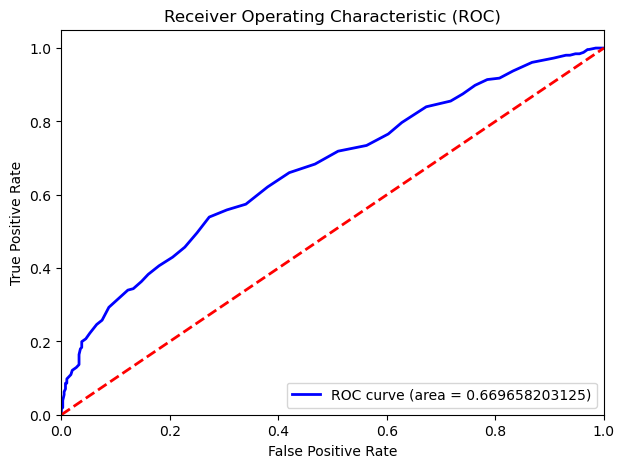

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = etc.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()


In [24]:
#Random Forest
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30],"min_samples_split":[2,6],"criterion":["gini","entropy"]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

In [25]:
params_RF = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [26]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

cv_method = StratifiedKFold(n_splits=3)
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(),
                               param_grid=params_RF,
                               cv=cv_method,
                               verbose=1,
                               n_jobs=2,
                               scoring="accuracy",
                               return_train_score=True)
GridSearchCV_RF.fit(x_train, y_train)
best_params_RF = GridSearchCV_RF.best_params_
print("Best Hyperparameters for random forest are =", best_params_RF)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Hyperparameters for random forest are = {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [27]:
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator

RandomForestClassifier(min_samples_split=10, n_estimators=200)

In [28]:
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator.fit(x_train,y_train)
y_pred_best = best_estimator.predict(x_test)
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       400
           1       0.67      0.31      0.42       256

    accuracy                           0.67       656
   macro avg       0.67      0.61      0.60       656
weighted avg       0.67      0.67      0.63       656



In [29]:
from sklearn.metrics import accuracy_score

# Assuming y_pred_best is the predictions made by your model on the test set
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of Random Forest Model = {round(accuracy*100, 2)}%")


Accuracy of Random Forest Model = 67.07%


In [30]:
water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [31]:
list1 = water_data.iloc[2:3,0:9].values.flatten().tolist()
list1

[8.099124189298397,
 224.23625939355776,
 19909.541732292397,
 9.275883602694089,
 333.7757766108134,
 418.6062130644815,
 16.868636929550973,
 66.42009251176368,
 3.0559337496641685]

In [32]:
water_data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [33]:
ph=float(input("enter the ph value = "))
Hardness=float(input("enter the Hardness value = "))
Solids=float(input("enter the Solids value = "))
Chloramines=float(input("enter the Chloramines value = "))
Sulfate=float(input("enter the Sulfate value = "))
Conductivity=float(input("enter the Conductivity value = "))
Organic_carbon=float(input("enter the organic_carbon value = "))
Trihalomethanes =float(input("enter the Trihalomethanes value = "))
Turbidity=float(input("enter the Turbidity value = "))

enter the ph value = 7
enter the Hardness value = 54
enter the Solids value = 65
enter the Chloramines value = 21
enter the Sulfate value = 65
enter the Conductivity value = 21
enter the organic_carbon value = 32
enter the Trihalomethanes value = 54
enter the Turbidity value = 12


In [34]:
input_data=[ph,Hardness, Solids, Chloramines, Sulfate, Conductivity,
       Organic_carbon, Trihalomethanes, Turbidity]

In [35]:
water_data_input=std_scaler.transform([[ph,Hardness, Solids, Chloramines, Sulfate, Conductivity,
       Organic_carbon, Trihalomethanes, Turbidity]])
water_data_input

array([[-0.05497228, -4.33066494, -2.5035372 ,  8.7675916 , -7.4376696 ,
        -5.01418698,  5.35576376, -0.78619396, 10.29551678]])

In [36]:
model_prediction=best_estimator.predict(water_data_input)
model_prediction

array([0], dtype=int64)

In [37]:
if model_prediction[0] ==0:
    print("water is not safe")
else:
    print("water is safe")

water is not safe


In [38]:
 def water_Quality_prediction(input_data):
        scaled_data = std_scaler.transform([input_data])
        model_prediction=best_estimator.predict(scaled_data)
        if model_prediction[0] ==0:
            return "water is not safe"
        else:
            return "water is safe"

In [39]:
ph=float(input("enter the ph value = "))
Hardness=float(input("enter the Hardness value = "))
Solids=float(input("enter the Solids value = "))
Chloramines=float(input("enter the Chloramines value = "))
Sulfate=float(input("enter the Sulfate value = "))
Conductivity=float(input("enter the Conductivity value = "))
Organic_carbon=float(input("enter the organic_carbon value = "))
Trihalomethanes =float(input("enter the Trihalomethanes value = "))
Turbidity=float(input("enter the Turbidity value = "))

input_data=[ph,Hardness, Solids, Chloramines, Sulfate, Conductivity,
       Organic_carbon, Trihalomethanes, Turbidity]

water_Quality_prediction(input_data)

enter the ph value = 7
enter the Hardness value = 54
enter the Solids value = 62
enter the Chloramines value = 32
enter the Sulfate value = 21
enter the Conductivity value = 45
enter the organic_carbon value = 125
enter the Trihalomethanes value = 126
enter the Turbidity value = 123


'water is safe'

In [40]:
import platform
print(platform.python_version())


3.9.13


In [41]:
import joblib

In [42]:
joblib.dump(best_estimator, 'Water_Quality_ML_trained_model.save')

['Water_Quality_ML_trained_model.save']

In [43]:
#file_name="Water_Quality_ML_trained_model.save"
#joblib.dump(best_estimator, open(file_name, "wb"))
